 
# DOP Agnostic Analysis of Telit LE910 modem/GNSS Signals/Noise

## Introduction
So one of the problems I encountered at work recently was that we had large swaths of medium to low quality GPS road data that we needed to filter to create a reasonable quality display. Furthermore, this data was collected without accompanying dilution of precision information. There was also no accompanying gyrometer, accelerometer, or compass data. We could begin collecting dilution of precision and sensor information moving forward, but we needed to a way to make the past data more viable in order to push forward.  


## Data

I did not have the bandwidth to create a large test suite for this analysis. I decided to select 16 hand-picked days of data, each with characteristics that will feed our understanding of good-quality data or demonstrate some problematic noise that I intend to diminish. I'm going to start of by showing completely unfiltered output because we may be able to make use of that information to inform further filtering.

I will be plotting each dataset along with velocity and acceleration charts.  This will demonstrate some of the extremely low hanging fruit before we move onto the initial step of modeling vehicle behavior and then a more complex confidence-based analysis.


#### d020-2017-02-10

This file show the GPS output of a stationary unit. The actual location of the unit is known and is shown by the blue marker. 

In [ ]:
# This is some initialization to allow us to render the following maps
%load_ext autoreload
%autoreload 2

import gnss_helpers
from ipyleaflet import Marker

In [13]:
m = gnss_helpers.get_map_for_data_file('d020-2017-02-10.csv', zoom=14)
actual_location_coords = [48.78385, -122.450]
actual_location = Marker(location=actual_location_coords)
m.center = actual_location_coords
m += actual_location
m

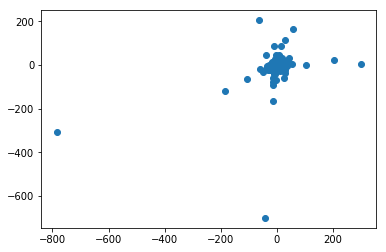

In [98]:
gnss_helpers.get_velocity_plot('d020-2017-02-10.csv')

Prior to this report, we were already filtering out point groups that suggested the vehicle was traveling over 150 miles per hour. Here we can see that several of the noisy points suggested the vehicle was traveling over 600 miles per hour.

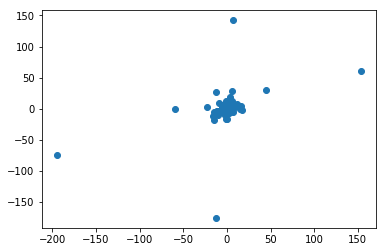

In [106]:
gnss_helpers.get_acceleration_plot('d020-2017-02-10.csv')

Above we have the raw acceleration vectors for this data set.  A vehicle acellerating or decellerating by more that 7mph per second is considered by the industry to be an extreme event. The accelerations we see here of over 100mph/s will give us one mechanism of identifying some of our noisiest points.

### d06a-2016-12-16.csv

Here's another plot of a stationary unit. All the data motion in the the signal coming off the unit is entirely noise.

In [14]:
gnss_helpers.get_map_for_data_file('d06a-2016-12-16.csv')

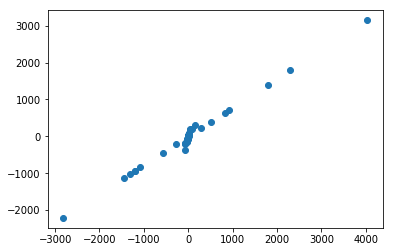

In [95]:
gnss_helpers.get_velocity_plot('d06a-2016-12-16.csv')

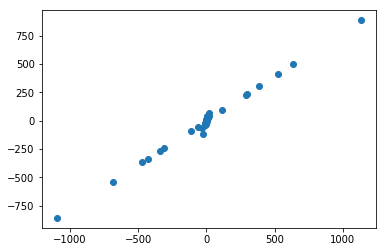

In [107]:
gnss_helpers.get_acceleration_plot('d06a-2016-12-16.csv')

In [12]:
gnss_helpers.get_map_for_data_file('d06a-2016-12-17.csv', zoom=10)

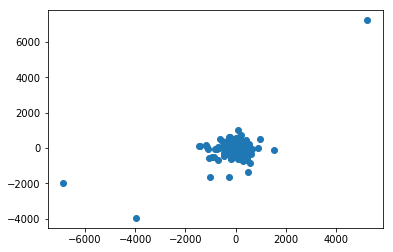

In [97]:
gnss_helpers.get_velocity_plot('d06a-2016-12-17.csv')

In [16]:
gnss_helpers.get_map_for_data_file('d06a-2016-12-18.csv', zoom=10)

In [21]:
gnss_helpers.get_map_for_data_file('d07a-2017-01-23.csv', zoom=15)

### d07a-2017-02-08.csv

The below is a mostly-good output of a route.  There's an errant ping from main street that veers off to South Lincoln Street.

In [7]:
gnss_helpers.get_map_for_data_file('d07a-2017-02-08.csv')

In [19]:
gnss_helpers.get_map_for_data_file('d07a-2017-02-09.csv', zoom=11)

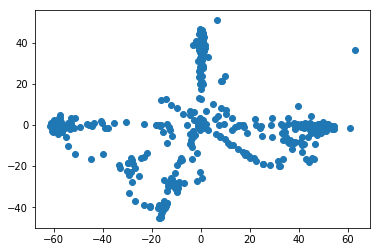

### d07e-2016-10-11

This, to me, is one of the most interesting datasets. We have a combination of a high-quality route as the vehicle travels along the road and also some moderately-bad noise as the vehicle idles between trips.  None of the movement shown between Iron Gate Road, Bakerview Spur, Alpine Way, and Midway Lane should be there.

In [25]:
gnss_helpers.get_map_for_data_file('d07e-2016-10-11.csv')

In [23]:
gnss_helpers.get_map_for_data_file('d07e-2016-10-24.csv')

In [24]:
gnss_helpers.get_map_for_data_file('d07e-2016-10-31.csv')

### d07e-2016-11-02

Here we have a series of very-high precision points for what was a stationary unit. There are few problems with the data here. Our ideal output would not show the tiny drifts around the actual point.

In [6]:
gnss_helpers.get_map_for_data_file('d07e-2016-11-02.csv', zoom=18)

In [29]:
gnss_helpers.get_map_for_data_file('d07e-2017-01-11.csv', zoom=12)

In [31]:
gnss_helpers.get_map_for_data_file('d0ec-2016-06-25.csv', zoom=12)

In [37]:
gnss_helpers.get_map_for_data_file('d0ec-2016-06-26.csv', zoom=7)

In [41]:
gnss_helpers.get_map_for_data_file('d0ec-2016-06-27.csv', zoom=6)

In [43]:
gnss_helpers.get_map_for_data_file('d0ec-2017-02-02.csv', zoom=17)